In [1]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.path.dirname("__file__"), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)

from src.data.load_data import load_images_from_folder
from src.preprocessing.steps.crop_plate import crop_plate
from src.preprocessing.steps.trim_ref_lines import trim_reference_lines
from src.preprocessing.steps.segment_spots import segment_spots, separate_overlaps

from src.visualization.visualize import show_image

# Load Image

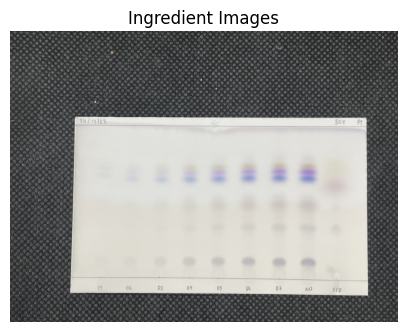

In [2]:
ingredients_path = os.path.join(project_root, 'data', 'ingredients')
mixtures_path = os.path.join(project_root, 'data', 'mixtures')

ingredient_images = load_images_from_folder(ingredients_path)
mixture_images = load_images_from_folder(mixtures_path)

# Display the images
show_image(ingredient_images[0], title="Ingredient Images")

# Preprocessing Pipeline

Crop plate

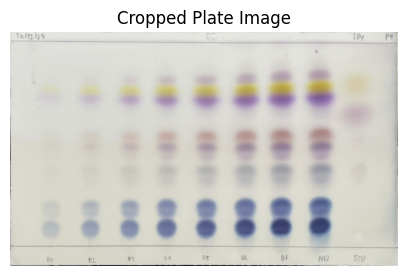

In [3]:
cropped_plate = crop_plate(ingredient_images[5])
show_image(cropped_plate, title="Cropped Plate Image")

Trim reference lines

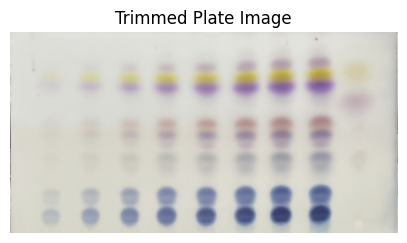

In [4]:
trimmed_plate = trim_reference_lines(cropped_plate)
show_image(trimmed_plate, title="Trimmed Plate Image")

Segment spot

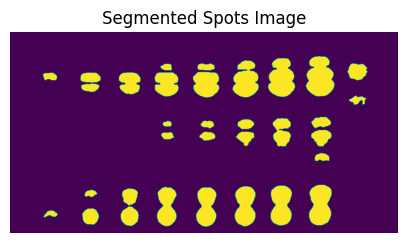

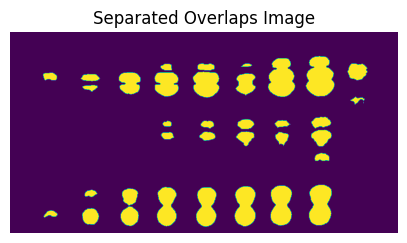

contours: before = 32  after = 36


In [7]:
mask0, _ = segment_spots(trimmed_plate)
show_image(mask0, title="Segmented Spots Image")
mask1, _ = separate_overlaps(mask0, area_hi=1500, width_hi=40, peak_ratio=0.3)
show_image(mask1, title="Separated Overlaps Image")

import cv2
print("contours: before =", len(cv2.findContours(mask0, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]),
      " after =", len(cv2.findContours(mask1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]))